In [1]:
import os

In [2]:
os.chdir("E:\\Courses\\Python Udemy\\ML in python\\Course_Material\\S_18_NLP")

In [3]:
import pandas as pd
import numpy as np
import nltk

In [4]:
sms = [line for line in open('smsspamcollection/SMSSpamcollection')]

In [6]:
len(sms)

5574

In [7]:
type(sms)

list

In [8]:
print(sms[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



In [102]:
sms_df = pd.read_csv("E:\\Courses\\Python Udemy\\ML in python\\Course_Material\\S_18_NLP\\smsspamcollection\\SMSSpamcollection"
                     ,sep = "\t", names = ['Target','sms'])

In [15]:
sms_df.head(2)

,Target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [17]:
sms_df.describe()

,Target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
sms_df.groupby('Target').describe()

sms                                                               
       count unique                                                top freq
Target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [20]:
sms_df['length'] = sms_df['sms'].apply(len)

# apply funcion is used to apply a specific function along an axis

In [21]:
sms_df.head(2)

,Target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


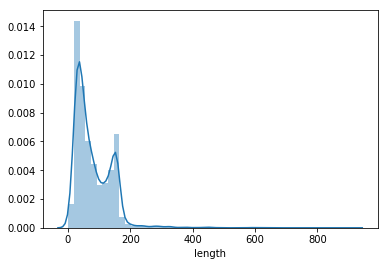

In [23]:
sns.distplot(sms_df['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B77AAA160>,
      dtype=object)

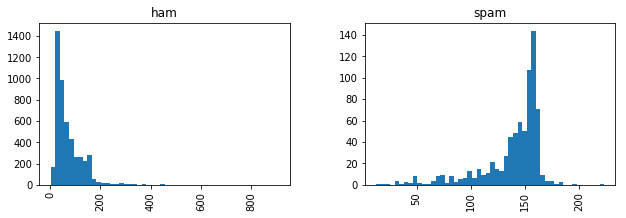

In [25]:
sms_df.hist(column = 'length',by = "Target", figsize = (10,3),bins = 50)

In [ ]:
############################################### TEXT PREPROCESSING ############################################################

#step 1 - we need to get rid of punctuations
#step 2 - convert the messages into individual words and return the list
#step 3 - get rid of common words(aka stop words)

#punctuations can be removed using python's string method

In [27]:
import string

In [30]:
#let us work on an example using a sample string

s = "sample string, remove punctuations from this string!."

In [31]:
s

'sample string, remove punctuations from this string!.'

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
non_punc = [char for char in s if char not in string.punctuation]

In [36]:
non_punc[0:10] # we are capturing all the non_punctuation characters

['s', 'a', 'm', 'p', 'l', 'e', ' ', 's', 't', 'r']

In [40]:
non_punc =  ''.join(non_punc)

In [41]:
non_punc

'sample string remove punctuations from this string'

In [42]:
# Now let us remove stop words

In [43]:
from nltk.corpus import stopwords

In [44]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [53]:
clean_s = [word for word in non_punc.split() if word.lower() not in stopwords.words('english')]

In [54]:
clean_s

['sample', 'string', 'remove', 'punctuations', 'string']

now let us write a function to do all the above steps
#1 remove punctuations
#2 remove stop words
#3 return list of words

In [55]:
def process_text(raw_text):
    
    #remove punctuations
    npunc = [char for char in raw_text if char not in string.punctuation]
    
    #joing with wide space
    npunc = ''.join(npunc)
    
    #remove stop words
    return [word for word in npunc.split() if word.lower() not in stopwords.words('english')]  

In [56]:
sms_df.head(2)

,Target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [57]:
# let us apply the above function on the first two messages

In [60]:
sms_df['sms'].head(2).apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: sms, dtype: object

In [61]:
sms_df['sms'].apply(process_text);

In [62]:
sms_df.head(2)

,Target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(sms_df['sms'])

In [66]:
len(bow_transformer.vocabulary_)

11425

In [68]:
bow_transformer.vocabulary_.get('call')

5275

#now let us transform the data

In [69]:
bow_df = bow_transformer.transform(sms_df['sms'])

In [70]:
bow_df.shape # the count vectorizer creates a sparse matrix so let us count how many were non_zeros

(5572, 11425)

In [71]:
bow_df.nnz

50548

In [72]:
#let us find the sparsity

total_elements = bow_df.shape[0]*bow_df.shape[1]

In [73]:
sparsity = (bow_df.nnz/total_elements)*100

In [74]:
sparsity

0.07940295412668218

In [75]:
# let us now import TF_IDF trnasformer available under sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
tfidf_trans = TfidfTransformer()

In [79]:
tfidf_trans.fit(bow_df)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [81]:
df_tfidf = tfidf_trans.transform(bow_df)

In [83]:
df_tfidf.shape

(5572, 11425)

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
spam_ham_detection = MultinomialNB()

In [86]:
from sklearn.model_selection import train_test_split

In [89]:
X = df_tfidf
y = sms_df['Target']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
spam_ham_detection.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
pred = spam_ham_detection.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [95]:
print(confusion_matrix(y_test,pred))

[[1593    0]
 [  71  175]]


In [97]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       1.00      0.71      0.83       246

avg / total       0.96      0.96      0.96      1839



In [109]:
# let us now take advantage of pipeline function from sklearn
from sklearn.pipeline import Pipeline

In [110]:
sms_df.head(2)

,Target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [111]:
X = sms_df['sms']
y = sms_df['Target']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [115]:
pipeline = Pipeline([
    
    #step1 tokenize the words using countvectorizer
    ('bow', CountVectorizer(analyzer=process_text) ),
    
    #step2 convert into TF_IDF using TfidfTransformer
    ('tfidf', TfidfTransformer()),
    
    #step3 apply the model
    ('nb_model', MultinomialNB())
])

In [116]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process_text at 0x0000023B77C83048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso..._tf=False, use_idf=True)), ('nb_model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [117]:
pred = pipeline.predict(X_test)

In [118]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       1.00      0.74      0.85       246

avg / total       0.97      0.96      0.96      1839

[[1593    0]
 [  65  181]]
